Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as your name and collaborators below:

In [ ]:
NAME = "Adriana Carolina Gonzalez-Cavazos"
COLLABORATORS = ""

---

# Homework 6: RNA-Seq and Transformation of Raw Data (Pre-processing) 
Curated by Sabah Ul-Hasan, Karthik Gangavarapu, Shang-Fu Chen, Jerry Zak, and Andrew Su

Complete homework is due every Tuesday at 8 AM PST. <br>
Save your homework as you go, so the efforts don't get lost. <br>
Note there are up 13 points, but you can only receive 10 points total for homework.

## A6.aa: Solidify your understanding of plotting in R [20-30 min] Group of 3 

### Question 1 (1 point)

1. Code review: Take turns briefly talking through your code and process (3-5 min), then spend the remaining time discussing the different approaches you may have taken to get to the same end-goal. Compare the types of visuals you included, and the how behind each of them.
1. For the last 5 minutes on your own, think of a suggestion of something you would've liked to learn in relation to these topics that we didn't cover.

## A6.ab: Familiarizing yourself with the FASTQ format

### Question 2 (2 points)
1. How many paired end and how many single end FASTQs are present in the folder `hw6/data/illumina_files/` ?
1. Count the number of reads in each of the sequenced samples. Consider paired reads to be one sample.

In [16]:
%%bash
pwd
cd data
cd illumina_example
ls *_R1.fastq| wc -l  #Single end FASTQ 
ls *_R2.fastq| wc -l  #Paired end FASTQ 

/gpfs/home/agonzalez/HW6
1
1


In [66]:
%%bash
cd data
cd illumina_example

#Number of reads on each file 
wc -l SRR12742806_R1.fastq
wc -l SRR12742806_R2.fastq

#Each file has 472 lines
echo $(( 472 / 4 )) #For every 4 lines we have 1 read.

echo $(( 118 * 2 ))#Each file has 118 reads. 118x 2 

472 SRR12742806_R1.fastq
472 SRR12742806_R2.fastq
118
236


## A6.ab: Familiarizing yourself with RNA-Seq, and output data [20-30 min] Group of 3
#### ab.ii Familiarizing yourself with raw RNA-Seq data and associated software (on your own time) <br>

### Question 3 (3 points)

1. What is the command to generate fastqc report for the file SRR5454101.1_downsampled?
2. What specific categories were flagged in `orange` or `red` in the report? Give reasons as to why they might have been flagged. Consult the manual for details on each analysis module - https://www.bioinformatics.babraham.ac.uk/projects/fastqc/Help/
3. Generate a fastqc report for the file `Zymo-GridION-EVEN-BB-SN_downsampled.fastq` present in the folder `hw6/data/nanopore_example/`. Contrast the report you generated here with the one you generated in question 1 by giving two specific quantities/analysis modules in which the two reports differ.

 **Question 1**
 What is the command to generate fastqc report for the file SRR5454101.1_downsampled?
**fastqc**

 **Question 2**
 What specific categories were flagged in orange or red in the report? Give reasons as to why they might have been flagged?<br>
- Per base sequence content: We would expect that there would not be difference between A and T, or G and C on each run. The lines should run parallel to each other <br>
- Per sequence GC content: The GC% content doesnt have a normal distribution <br>
- Per base N content: The first and last positions show an N content of >20%.<br>
- Sequence length distribution: Sequences are not the same lenght. Most of them have a lenght of 50bp. <br>
- Overrepresented sequences: There are 3 sequences that are overrepresented. The sequences represents more than 0.1% (but less than 1%) of the total sequences.  

 **Question 3**
Contrast the SRR5454101.1 and Zymo-GridION-EVEN-BB-SN  fastqc report  <br>
a) Per base sequence quality: Compared to the first file, where all the  positions in the read has good quality, on the second file only the first positions have good quality; the quality of calls degrade as the run progresses.  <br>

b) Sequence Length Distribution: The distribution of read lenghts on the second file is greater than the first file. While the majority of reads on the first file has a lenght between 47 and 51, on the second file the graph shows multiple peaks indicating that the fragment size is not uniform.  <br>

## A6.ba: Processing alignments [20-30 min] TPS

### Question 4 (4 points)

Use hisat2 to create an index of the ENST00000427411.1.fa fasta file present in the folder `hw6/data/ref/`. Now, use hisat2 to align the paired reads from the sample SRR12742806, located at `hw6/data/illumina_example/`, to the reference you created in the previous step.

1. How many reads mapped to the genome?
2. What is the size of the SAM file and the size of the BAM file? 
3. Generate a plot of the average depth per position of this alignment.
4. What percentage of the reference genome is covered by the sequenced reads in this alignment? 

**How many reads mapped to the genome?** 80 reads aligned exactly 1 time and 12 reads aligned more than 1 times <br>
**What is the size of the SAM file and the size of the BAM file?** SAM: 14K BAM: 72K <br>

,genome_reference,genome_position,read_depth
,<fct>,<int>,<int>
1,hg38_knownGene_ENST00000427411.1,1,0
2,hg38_knownGene_ENST00000427411.1,2,0
3,hg38_knownGene_ENST00000427411.1,3,0
4,hg38_knownGene_ENST00000427411.1,4,0
5,hg38_knownGene_ENST00000427411.1,5,0
6,hg38_knownGene_ENST00000427411.1,6,0


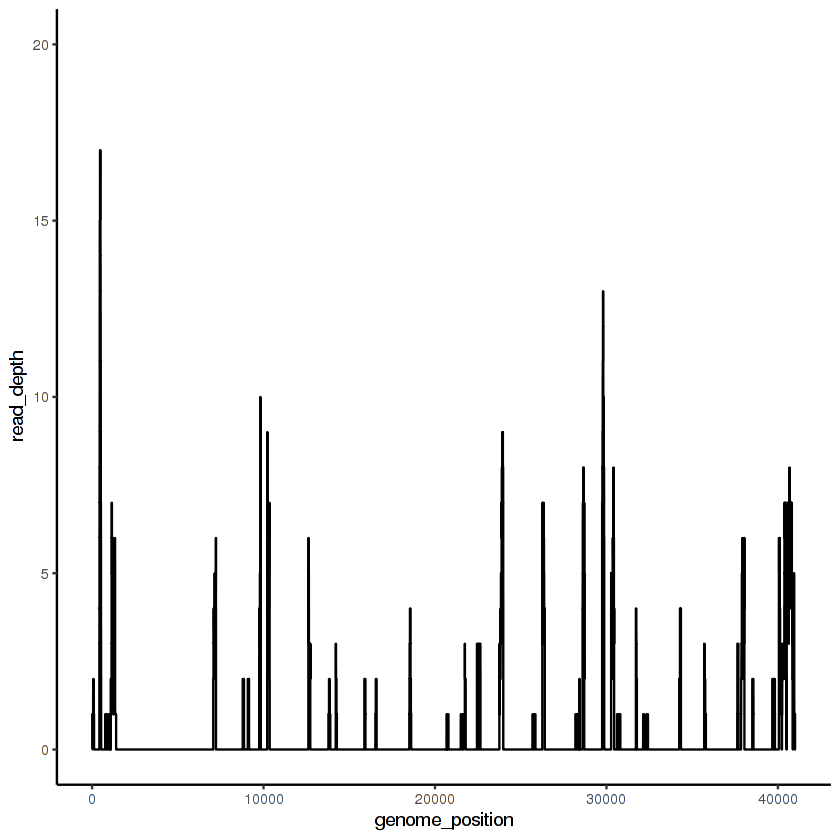

In [51]:
#Q3 Generate a plot of the average depth per position of this alignment.

#Import library 

library(dplyr)
library(ggplot2) 

#Import data

setwd ('/gpfs/home/agonzalez/HW6/data/illumina_example')
SRR12742806_depth_data <- read.table ("SRR12742806.depth")

SRR12742806_depth_data <-  SRR12742806_depth_data %>% 
  rename(
    genome_reference = V1,
    genome_position = V2, 
      read_depth = V3)

head (SRR12742806_depth_data)


#Generate plot 
ggplot(SRR12742806_depth_data, aes (x = genome_position, y = read_depth)) + 
geom_line()+
ylim(0, 20) +
theme_classic()

In [52]:
#Q4 What percentage of the reference genome is covered by the sequenced reads in this alignment?


coverage<- sum (SRR12742806_depth_data$read_depth > 0) / length(SRR12742806_depth_data$genome_position) * 100

paste ("Percentage of the reference genome covered by the sequenced reads is: ",coverage, "%")

[1] "Percentage of the reference genome covered by the sequenced reads is:  12.905426809952 %"

### Question 5 (1 point)

Look up the [samtools manual](https://www.htslib.org/doc/samtools.html) and paste the command that is required to convert BAM files to FASTQ.

Command:
$samtools fastq SRR12742806.bam > SRR12742806_R1_R2.fastq 


### Question 6 (2 points)

We've previously seen that it is possible to combine bash commands using a pipe(`|`). Use the pipe to write a one-liner in bash to produce a sorted BAM file starting with the FASTQ files.

hisat2 -x ../ref/index -1 SRR12742806_R1.fastq -2 SRR12742806_R2.fastq | samtools view -b | samtools sort -o SRR12742806_sorted.bam